In [4]:
#reading dataset
import pandas as pd
import numpy as np
%cd C:\Users\Sruthi Ashraf\Downloads\AED50_Challenge_Data_23Nov\AED50_Challenge_Data\Competition_Data\Lidar
Lidar=pd.read_csv('collection_one.csv') 
Lidar.head()

C:\Users\Sruthi Ashraf\Downloads\AED50_Challenge_Data_23Nov\AED50_Challenge_Data\Competition_Data\Lidar


,Timestamp,ID,Label,Confidence,BBox_Position_X,BBox_Position_Y,BBox_Size_X,BBox_Size_Y,BBox_Size_Z,BBox_Yaw,Velocity_X,Velocity_Y,Tracking_Status
0,1633705176084,351284,1,0.663271,3.119813,11.643920,4.820237,2.509954,0.982162,1.068359,5.313779,9.383846e+00,3
1,1633705176084,351314,4,0.280000,-2.546913,-9.031250,0.700000,0.700000,1.674027,3.620596,-0.000767,1.420000e-12,1
2,1633705176084,351305,2,0.557778,17.113178,-12.025629,0.117142,0.482906,1.469934,4.994645,0.296628,-1.022861e+00,4
3,1633705176084,351304,2,0.498057,-14.341146,10.672971,0.139692,0.358661,1.636156,3.617036,-1.280785,-6.593904e-01,4
4,1633705176187,351284,1,0.633271,3.716784,12.510355,4.720977,2.438679,1.003231,1.099034,5.062372,8.908297e+00,3


In [ ]:
#taking a copy of the dataset to perform appropriate modification
df=Lidar.copy()

In [ ]:
df.head()

In [68]:
# getting the datatype info of each column.Looks like we need to change the datatype for timestamp
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41130 entries, 0 to 41129
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        41130 non-null  int64  
 1   ID               41130 non-null  int64  
 2   Label            41130 non-null  int64  
 3   Confidence       41130 non-null  float64
 4   BBox_Position_X  41130 non-null  float64
 5   BBox_Position_Y  41130 non-null  float64
 6   BBox_Size_X      41130 non-null  float64
 7   BBox_Size_Y      41130 non-null  float64
 8   BBox_Size_Z      41130 non-null  float64
 9   BBox_Yaw         41130 non-null  float64
 10  Velocity_X       41130 non-null  float64
 11  Velocity_Y       41130 non-null  float64
 12  Tracking_Status  41130 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 4.1 MB


In [69]:
import datetime

d=1633705230077
x=datetime.datetime.fromtimestamp(int(d/1000))
x=x.strftime("%Y-%m-%d %H:%M:%S")
x

'2021-10-08 10:00:30'

In [70]:
type(x)

str

In [71]:
#converting unix timestamp to datetime format
df['Timestamp']=pd.to_datetime(df['Timestamp'], unit='ms')

In [72]:
#checking whether the datetime conversion took place
df.head()

,Timestamp,ID,Label,Confidence,BBox_Position_X,BBox_Position_Y,BBox_Size_X,BBox_Size_Y,BBox_Size_Z,BBox_Yaw,Velocity_X,Velocity_Y,Tracking_Status
0,2021-10-08 14:59:36.084,351284,1,0.663271,3.119813,11.643920,4.820237,2.509954,0.982162,1.068359,5.313779,9.383846e+00,3
1,2021-10-08 14:59:36.084,351314,4,0.280000,-2.546913,-9.031250,0.700000,0.700000,1.674027,3.620596,-0.000767,1.420000e-12,1
2,2021-10-08 14:59:36.084,351305,2,0.557778,17.113178,-12.025629,0.117142,0.482906,1.469934,4.994645,0.296628,-1.022861e+00,4
3,2021-10-08 14:59:36.084,351304,2,0.498057,-14.341146,10.672971,0.139692,0.358661,1.636156,3.617036,-1.280785,-6.593904e-01,4
4,2021-10-08 14:59:36.187,351284,1,0.633271,3.716784,12.510355,4.720977,2.438679,1.003231,1.099034,5.062372,8.908297e+00,3


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41130 entries, 0 to 41129
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        41130 non-null  datetime64[ns]
 1   ID               41130 non-null  int64         
 2   Label            41130 non-null  int64         
 3   Confidence       41130 non-null  float64       
 4   BBox_Position_X  41130 non-null  float64       
 5   BBox_Position_Y  41130 non-null  float64       
 6   BBox_Size_X      41130 non-null  float64       
 7   BBox_Size_Y      41130 non-null  float64       
 8   BBox_Size_Z      41130 non-null  float64       
 9   BBox_Yaw         41130 non-null  float64       
 10  Velocity_X       41130 non-null  float64       
 11  Velocity_Y       41130 non-null  float64       
 12  Tracking_Status  41130 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(3)
memory usage: 4.1 MB


In [74]:
#looking for cars with more than 85% confidence
df[(df['Confidence'] > 0.85) & (df['Label'] == 1)]

,Timestamp,ID,Label,Confidence,BBox_Position_X,BBox_Position_Y,BBox_Size_X,BBox_Size_Y,BBox_Size_Z,BBox_Yaw,Velocity_X,Velocity_Y,Tracking_Status
131,2021-10-08 14:59:40.025,351315,1,0.856623,-9.696652,8.951242,5.036574,2.264301,1.591564,4.767560,1.134256,-3.397135,3
136,2021-10-08 14:59:40.142,351315,1,0.856623,-9.754591,8.547807,5.030963,2.310379,1.614138,4.751935,0.880594,-3.549629,3
141,2021-10-08 14:59:40.265,351315,1,0.856623,-9.795122,8.131456,5.022789,2.287740,1.616750,4.708975,0.687511,-3.678052,3
146,2021-10-08 14:59:40.383,351315,1,0.856623,-9.827881,7.629484,5.039062,2.281080,1.635106,4.631827,0.514469,-3.826291,3
152,2021-10-08 14:59:40.511,351315,1,0.856623,-9.967152,7.163572,5.039062,2.258636,1.645422,4.566397,0.195588,-3.971758,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41105,2021-10-08 15:12:02.181,353532,1,0.882369,21.000265,-0.694972,5.350011,2.093307,2.090947,2.521475,-0.166951,0.054942,3
41110,2021-10-08 15:12:02.280,353532,1,0.882369,20.977613,-0.679461,5.333760,2.090616,2.094396,2.520987,-0.176797,0.059843,3
41115,2021-10-08 15:12:02.405,353532,1,0.882369,20.978941,-0.663778,5.318353,2.086633,2.118410,2.514639,-0.173436,0.069674,3
41120,2021-10-08 15:12:02.512,353532,1,0.882369,20.940092,-0.638137,5.310736,2.084415,2.106011,2.523428,-0.192499,0.089767,3


In [75]:
#None (0), Car (1), Pedestrian (2), Cyclist (3), Misc (4)
#dataset that remains after removing cars with more than 85% confidence
df=pd.concat([df,df[(df['Confidence'] > 0.85) & (df['Label'] == 1)]]).drop_duplicates(keep=False)

In [76]:
df.describe()

,ID,Label,Confidence,BBox_Position_X,BBox_Position_Y,BBox_Size_X,BBox_Size_Y,BBox_Size_Z,BBox_Yaw,Velocity_X,Velocity_Y,Tracking_Status
count,31528.000000,31528.000000,31528.000000,31528.000000,31528.000000,31528.000000,31528.000000,31528.000000,31528.000000,31528.000000,31528.000000,31528.000000
mean,352442.187008,1.886672,0.628130,1.392738,6.249248,2.504964,1.809304,1.655885,3.510109,-0.061631,0.063867,2.759071
std,589.756427,1.024552,0.181825,12.002700,11.138796,2.143320,1.463001,0.505695,2.069745,1.981518,2.865030,0.836072
min,351284.000000,0.000000,0.000000,-27.084785,-29.439220,0.021704,0.033196,0.512664,0.000000,-18.592970,-19.319469,1.000000
25%,352047.000000,1.000000,0.534135,-9.306782,-2.243421,0.700000,0.700000,1.407030,1.312863,-0.329000,-0.366225,3.000000
50%,352529.000000,2.000000,0.670852,0.213244,4.570821,1.524655,1.634197,1.659617,4.059084,0.021969,0.000000,3.000000
75%,352881.250000,2.000000,0.775835,11.694013,13.544471,4.813272,2.294077,1.816113,5.635236,0.235902,0.420562,3.000000
max,353584.000000,4.000000,0.849964,31.658167,35.590656,13.336719,11.312500,4.499220,6.282570,14.866463,16.425610,4.000000


In [77]:
df['Label'].unique()

array([1, 4, 2, 3, 0], dtype=int64)

In [78]:
#lets check for only pedestrians(2)
df[df['Label']==2].describe()

,ID,Label,Confidence,BBox_Position_X,BBox_Position_Y,BBox_Size_X,BBox_Size_Y,BBox_Size_Z,BBox_Yaw,Velocity_X,Velocity_Y,Tracking_Status
count,12030.000000,12030.0,12030.000000,12030.000000,12030.000000,12030.000000,12030.000000,12030.000000,12030.000000,12030.000000,1.203000e+04,12030.000000
mean,352523.646135,2.0,0.645947,5.917827,6.799884,0.712687,0.715840,1.671020,3.361262,-0.031015,-1.118458e-02,3.041895
std,509.477518,0.0,0.101879,11.587342,9.176171,0.261044,0.263065,0.344811,2.063595,0.793460,7.672697e-01,0.453956
min,351304.000000,2.0,0.216458,-20.256592,-19.015629,0.054761,0.037415,0.624136,0.000000,-8.264691,-1.376973e+01,2.000000
25%,352052.000000,2.0,0.574256,-2.588546,0.040751,0.700000,0.700000,1.552585,1.436550,-0.368032,-3.828282e-01,3.000000
50%,352561.000000,2.0,0.655622,7.773524,7.973173,0.700000,0.700000,1.670758,3.370393,0.019549,-1.815000e-11,3.000000
75%,352821.250000,2.0,0.733323,12.657366,12.836236,0.700000,0.700000,1.805163,5.575671,0.164196,3.896602e-01,3.000000
max,353584.000000,2.0,0.824594,29.598986,29.947901,5.393415,5.788192,4.499121,6.282570,5.088287,6.996300e+00,4.000000


In [79]:
ped=df[df['Label']==2]

In [80]:
ped.head()

,Timestamp,ID,Label,Confidence,BBox_Position_X,BBox_Position_Y,BBox_Size_X,BBox_Size_Y,BBox_Size_Z,BBox_Yaw,Velocity_X,Velocity_Y,Tracking_Status
2,2021-10-08 14:59:36.084,351305,2,0.557778,17.113178,-12.025629,0.117142,0.482906,1.469934,4.994645,0.296628,-1.022861,4
3,2021-10-08 14:59:36.084,351304,2,0.498057,-14.341146,10.672971,0.139692,0.358661,1.636156,3.617036,-1.280785,-0.659390,4
6,2021-10-08 14:59:36.187,351305,2,0.527778,17.166819,-12.090954,0.203518,0.408079,1.399189,5.235987,0.376123,-1.029529,3
7,2021-10-08 14:59:36.187,351304,2,0.498057,-14.387434,10.649923,0.139692,0.358661,1.636156,3.590088,-1.298087,-0.624641,4
10,2021-10-08 14:59:36.297,351305,2,0.497778,17.289467,-12.164828,0.160431,0.435156,1.425880,4.712389,0.431542,-1.027546,3


In [81]:
ped['ID']=ped['ID'].astype(str)

<ipython-input-81-b75fbeb3c826>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ped['ID']=ped['ID'].astype(str)


In [82]:
ped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12030 entries, 2 to 41129
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        12030 non-null  datetime64[ns]
 1   ID               12030 non-null  object        
 2   Label            12030 non-null  int64         
 3   Confidence       12030 non-null  float64       
 4   BBox_Position_X  12030 non-null  float64       
 5   BBox_Position_Y  12030 non-null  float64       
 6   BBox_Size_X      12030 non-null  float64       
 7   BBox_Size_Y      12030 non-null  float64       
 8   BBox_Size_Z      12030 non-null  float64       
 9   BBox_Yaw         12030 non-null  float64       
 10  Velocity_X       12030 non-null  float64       
 11  Velocity_Y       12030 non-null  float64       
 12  Tracking_Status  12030 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 1.3+ MB


In [83]:
#None (0), Validating (1), Invalidating (2), Tracking (3), Drifting (4), Expired (5)
#None (0), Car (1), Pedestrian (2), Cyclist (3), Misc (4)
ped.sort_values(by=['ID','Timestamp'],ascending=[0,1],inplace=True)
ped=ped.reset_index(drop=True)

<ipython-input-83-62d1cc822f53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ped.sort_values(by=['ID','Timestamp'],ascending=[0,1],inplace=True)


In [84]:
ped[ped['ID']==353580]

,Timestamp,ID,Label,Confidence,BBox_Position_X,BBox_Position_Y,BBox_Size_X,BBox_Size_Y,BBox_Size_Z,BBox_Yaw,Velocity_X,Velocity_Y,Tracking_Status


In [85]:
ped_25_50=ped[(ped['Confidence']>=0.25) & (ped['Confidence']<=0.50)]

In [86]:
ped_0_25=ped[(ped['Confidence']>=0) & (ped['Confidence']<=0.25)]


In [87]:
ped_0_25['Velocity_X'].mean()

-0.022421902933333238

In [88]:
ped_0_25

,Timestamp,ID,Label,Confidence,BBox_Position_X,BBox_Position_Y,BBox_Size_X,BBox_Size_Y,BBox_Size_Z,BBox_Yaw,Velocity_X,Velocity_Y,Tracking_Status
696,2021-10-08 15:11:11.108,353336,2,0.216458,27.144552,1.751102,0.413244,0.715750,1.948807,2.268928,-0.910706,0.570961,3
923,2021-10-08 15:11:06.926,353311,2,0.227577,12.854349,-8.477612,0.187570,0.667454,1.481340,4.712389,0.682357,-1.052900,3
924,2021-10-08 15:11:07.036,353311,2,0.227577,12.885536,-8.526479,0.187570,0.667454,1.481340,5.272963,0.667076,-1.062647,4
930,2021-10-08 15:11:09.338,353311,2,0.247031,15.714110,-10.656422,0.203787,0.754071,1.455743,5.061455,0.988169,-0.996203,3
931,2021-10-08 15:11:09.439,353311,2,0.247031,15.757009,-10.699745,0.754071,0.203787,1.455743,5.492114,0.986549,-0.997807,4
1353,2021-10-08 15:10:53.510,353258,2,0.240580,-9.824770,8.526827,1.362462,0.432599,1.819425,5.061455,1.520310,-0.751321,3
6177,2021-10-08 15:06:56.365,352544,2,0.244480,-7.451286,7.305979,0.749023,1.509766,1.907341,6.257311,1.012178,-1.063353,3
7393,2021-10-08 15:05:45.016,352314,2,0.226779,14.878908,3.203855,0.479306,0.221852,1.093985,3.316125,-4.015826,1.600633,3
7397,2021-10-08 15:05:38.726,352290,2,0.232271,5.015372,18.099005,0.620207,2.022899,1.699106,2.617994,-1.131904,0.893487,3


In [89]:
min(ped_25_50['Velocity_X'])

-8.264691353

In [90]:
max(ped_25_50['Velocity_X'])

5.052525997

In [91]:
from statistics import mean,median
mean(ped_25_50['Velocity_X'])

-0.05042406226521114

In [92]:
Y=ped_25_50.groupby('ID')['Velocity_X'].mean()
Y

ID
351304   -1.289436
351305    0.431542
351314    0.058071
351374   -0.971772
351403   -0.616778
            ...   
353363    0.828063
353383   -0.704303
353389   -0.734951
353408    0.036368
353529    1.234099
Name: Velocity_X, Length: 96, dtype: float64

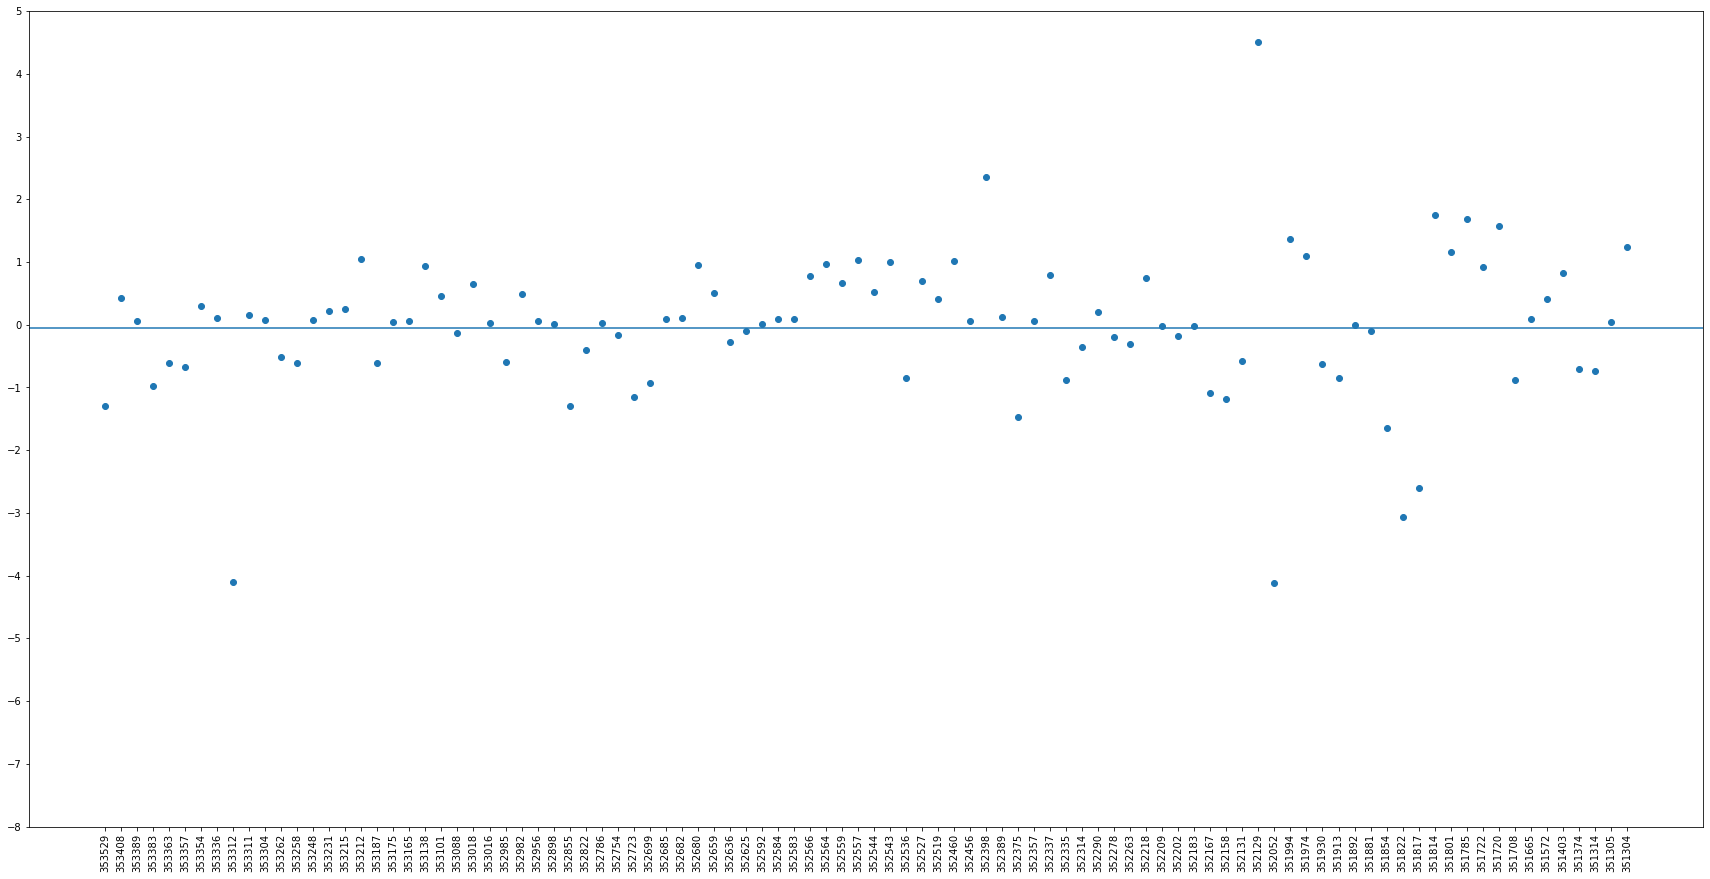

In [93]:
import matplotlib.pyplot as plt 
y1=np.arange(-8,6,1)
fig,ax=plt.subplots(figsize=[30,15])
plt.scatter(x=ped_25_50['ID'].unique(),y=Y )
plt.xticks(rotation=90)
plt.axhline(mean(ped_25_50['Velocity_X']))
plt.yticks(y1)
plt.show()

In [94]:
ped_50_75=ped[(ped['Confidence']>=0.50) & (ped['Confidence']<=0.75)]

In [95]:
ped_50_75['Velocity_X'].mean()

-0.028747148910456384

In [96]:
ped_75_100=ped[(ped['Confidence']>=0.75) & (ped['Confidence']<=1)]

In [97]:
ped_75_100['Velocity_X'].mean()

-0.02805679449125402

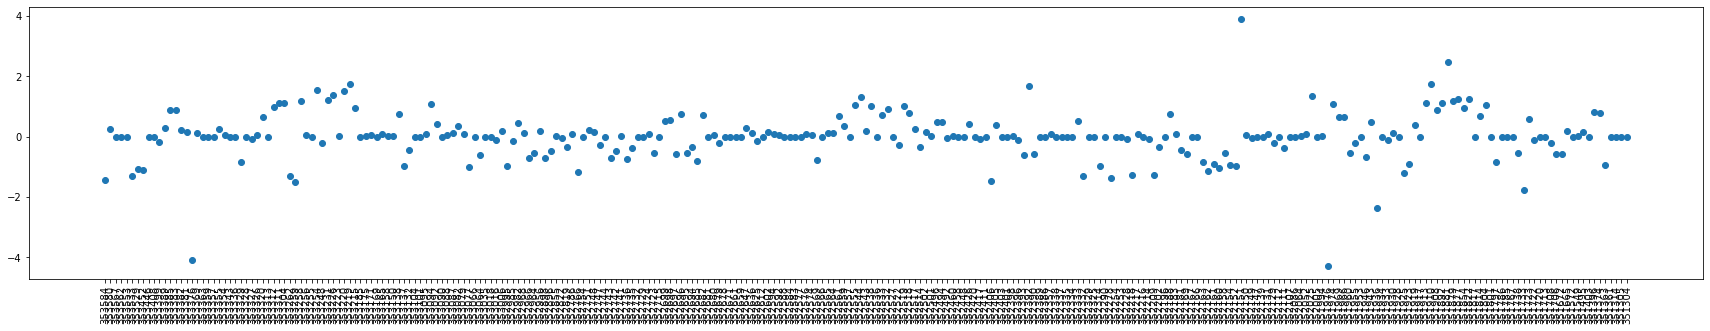

In [98]:
fig,ax=plt.subplots(figsize=[30,5])
plt.scatter(x=ped_50_75['ID'].unique(),y=ped_50_75.groupby('ID')['Velocity_X'].mean())
plt.xticks(rotation=90)
#plt.yticks
plt.show()

In [99]:
ped_drop_0_25=ped[(ped['Confidence']>=0.25) & (ped['Confidence']<=1)]
ped_drop_0_25.head()

,Timestamp,ID,Label,Confidence,BBox_Position_X,BBox_Position_Y,BBox_Size_X,BBox_Size_Y,BBox_Size_Z,BBox_Yaw,Velocity_X,Velocity_Y,Tracking_Status
0,2021-10-08 15:12:02.615,353584,2,0.522987,15.421875,-12.812501,0.7,0.7,1.449235,5.959943,0.000000,0.000000e+00,2
1,2021-10-08 15:11:58.976,353580,2,0.552471,16.077686,-12.468752,0.7,0.7,1.460927,2.661124,-0.004519,0.000000e+00,2
2,2021-10-08 15:11:59.073,353580,2,0.552471,16.077524,-12.468752,0.7,0.7,1.460927,2.661124,-0.004519,-6.730000e-11,2
3,2021-10-08 15:11:59.195,353580,2,0.552471,16.077366,-12.468753,0.7,0.7,1.460927,2.661124,-0.004519,-1.850000e-10,2
4,2021-10-08 15:11:59.292,353580,2,0.552471,16.077204,-12.468754,0.7,0.7,1.460927,2.661124,-0.004519,-6.730000e-11,2


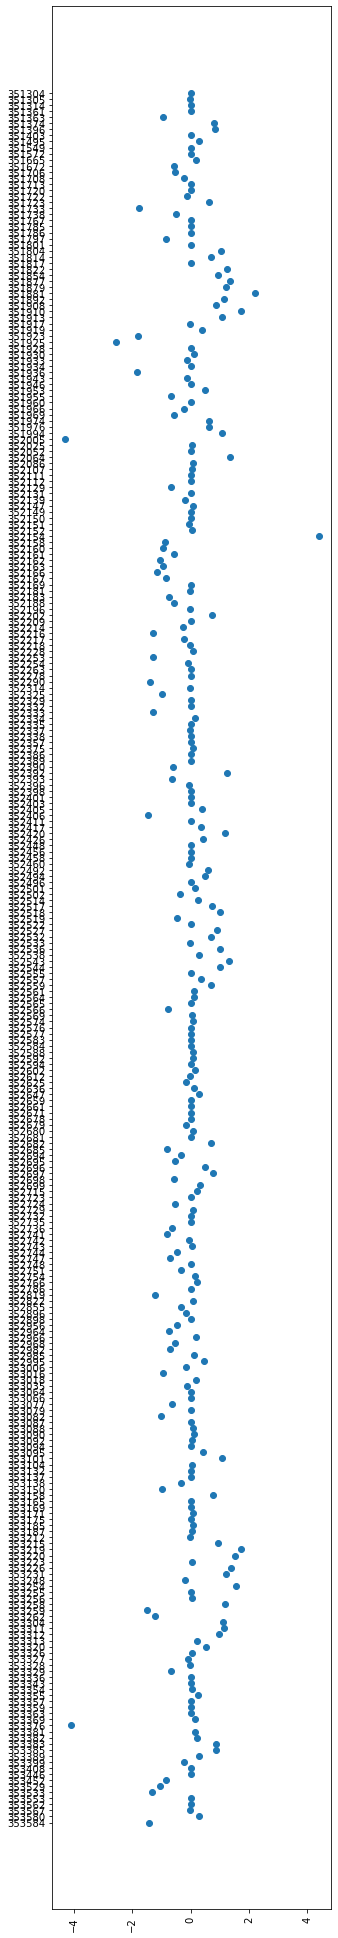

In [100]:
fig,ax=plt.subplots(figsize=[5,35])
plt.scatter(x=ped_drop_0_25.groupby('ID')['Velocity_X'].mean(),y=ped_drop_0_25['ID'].unique())
plt.xticks(rotation=90)
plt.show()

In [101]:
Time=ped_drop_0_25[['ID','Timestamp']]

In [102]:
T=Time.groupby('ID')['Timestamp'].apply(lambda x:max(x)-min(x))

In [103]:
#T=T.reset_index(drop=True)
T.index

Index(['351304', '351305', '351314', '351361', '351363', '351374', '351396',
       '351403', '351495', '351549',
       ...
       '353408', '353446', '353452', '353529', '353533', '353553', '353562',
       '353567', '353580', '353584'],
      dtype='object', name='ID', length=286)

In [104]:
ped_vel=ped_drop_0_25[['ID','Velocity_X']]

In [105]:
vel_mean=ped_vel.groupby('ID').mean()

In [106]:
df=pd.merge(T,vel_mean,left_index=True,right_index=True)

In [107]:
df.head()

,Timestamp,Velocity_X
ID,,
351304,0 days 00:00:04.656000,-1.435785
351305,0 days 00:00:01.202000,0.273362
351314,0 days 00:00:06.480000,-0.014801
351361,0 days 00:00:00.369000,0.000000
351363,0 days 00:00:00.465000,0.001567


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 351304 to 353584
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   Timestamp   286 non-null    timedelta64[ns]
 1   Velocity_X  286 non-null    float64        
dtypes: float64(1), timedelta64[ns](1)
memory usage: 14.8+ KB


In [109]:
df['seconds']=df['Timestamp'].dt.total_seconds()

In [110]:
df.head()

,Timestamp,Velocity_X,seconds
ID,,,
351304,0 days 00:00:04.656000,-1.435785,4.656
351305,0 days 00:00:01.202000,0.273362,1.202
351314,0 days 00:00:06.480000,-0.014801,6.480
351361,0 days 00:00:00.369000,0.000000,0.369
351363,0 days 00:00:00.465000,0.001567,0.465


In [111]:
df[df['seconds']>20]

,Timestamp,Velocity_X,seconds
ID,,,
351801,0 days 00:00:31.180000,-0.664086,31.180
351913,0 days 00:00:38.235000,0.045780,38.235
352052,0 days 00:02:08.726000,0.040780,128.726
352111,0 days 00:00:25.875000,0.052403,25.875
352218,0 days 00:00:39.366000,-0.317450,39.366
352543,0 days 00:00:30.285000,0.293526,30.285
352592,0 days 00:00:41.213000,0.027755,41.213
352680,0 days 00:01:10.441000,-0.043820,70.441
352699,0 days 00:00:40.382000,-0.003833,40.382


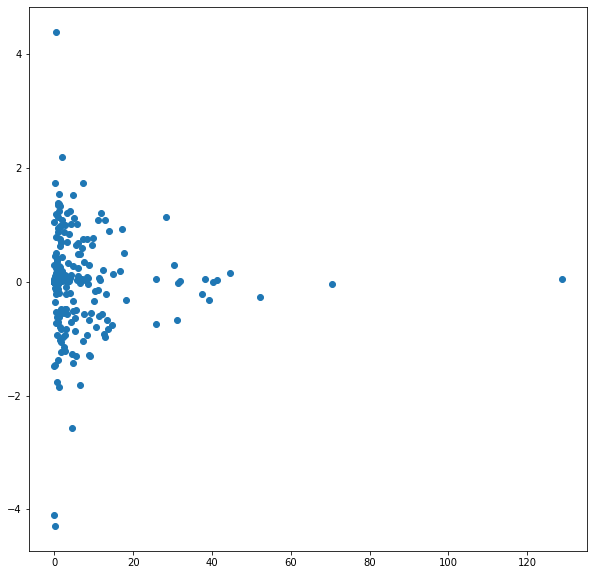

In [112]:
fig,ax=plt.subplots(figsize=[10,10])
plt.scatter(x=df['seconds'],y=df['Velocity_X'])

In [113]:
from sklearn.cluster import KMeans 
K=range(1,11)
sse=[]
for i in K:
    KM=KMeans(n_clusters=i)
    KM.fit_predict(df[['seconds','Velocity_X']])
    sse.append(KM.inertia_)
    

C:\Users\thenappanz\OneDrive\Documents\pendrive\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


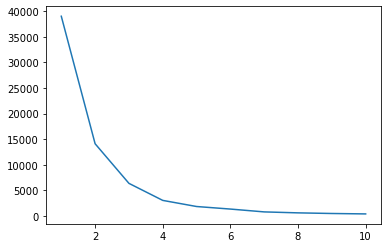

In [114]:
#fig,ax=plt.subplots(figsize=[5,5])
plt.plot(K,sse)

In [115]:
    KM=KMeans(n_clusters=3)
    n_clusters=KM.fit_predict(df[['seconds','Velocity_X']])
    n_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [116]:
df['clusters']=n_clusters

In [117]:
df.head()

,Timestamp,Velocity_X,seconds,clusters
ID,,,,
351304,0 days 00:00:04.656000,-1.435785,4.656,1
351305,0 days 00:00:01.202000,0.273362,1.202,1
351314,0 days 00:00:06.480000,-0.014801,6.480,1
351361,0 days 00:00:00.369000,0.000000,0.369,1
351363,0 days 00:00:00.465000,0.001567,0.465,1


In [122]:
df['clusters']==0

ID
351304    False
351305    False
351314    False
351361    False
351363    False
          ...  
353553    False
353562    False
353567    False
353580    False
353584    False
Name: clusters, Length: 286, dtype: bool

Text(0, 0.5, 'Velocity_X')

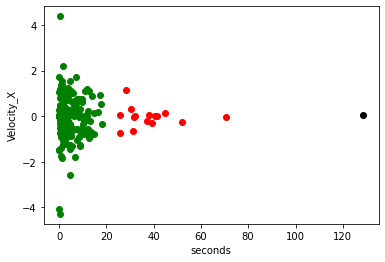

In [127]:
df1=df[df['clusters']==0]
df2=df[df['clusters']==1]
df3=df[df['clusters']==2]
plt.scatter(df1['seconds'],df1['Velocity_X'],color='red')
plt.scatter(df2['seconds'],df2['Velocity_X'],color='green')
plt.scatter(df3['seconds'],df3['Velocity_X'],color='black')
plt.xlabel('seconds')
plt.ylabel('Velocity_X')